In [378]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from Bio import SeqIO
import os
import re

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder

from itertools import combinations, permutations, product
import random

In [379]:
#SeqIO.parse(open(filepath),'fasta')

In [380]:
files=os.listdir('text_data')

In [381]:
pattern='\[.+'
dna_sequences={}
host_species={}

for file in files:
    filepath=f'text_data\{file}'
    if 'DNA' in file:
        with open(filepath, "r") as f:
            for i in (f.read().split('>g'))[1:]:
                genome=i.split(')]')[1].strip('\n').replace("\n", '')
                name=re.findall(pattern, i.split(']')[0])[0].strip("[]'")
                dna_sequences[name]=genome
                if 'Bat' in file:
                    host_species[name]='Bat'
                elif 'Rodent' in file:
                    host_species[name]='Rodent'
                elif 'Mosquito' in file:
                    host_species[name]='Mosquito'
                elif 'Tick' in file:
                    host_species[name]='Tick'

In [382]:
viruses=pd.DataFrame(zip(dna_sequences.keys(), dna_sequences.values()), columns=['Name', 'DNA_Sequence'])
viruses['DNA_length']=viruses.DNA_Sequence.str.len()
viruses.sort_values(by='DNA_length', ascending=False, inplace=True)
viruses.drop_duplicates(['DNA_Sequence'], inplace=True, keep='first', ignore_index=True)

assert(viruses.isna().sum().values.sum()==0)

In [383]:
species=pd.DataFrame(zip(host_species.keys(), host_species.values()), columns=['Name', 'Host_Species'])

In [384]:
viruses=viruses.merge(pd.DataFrame(zip(host_species.keys(), host_species.values()), columns=['Name', 'Host_Species']), how='left', left_on='Name', right_on='Name')

In [385]:
viruses['Host_Species'].value_counts()

Bat         13220
Rodent      10482
Mosquito    10240
Tick         6310
Name: Host_Species, dtype: int64

In [386]:
viruses.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40252 entries, 0 to 40251
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Name          40252 non-null  object
 1   DNA_Sequence  40252 non-null  object
 2   DNA_length    40252 non-null  int64 
 3   Host_Species  40252 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.5+ MB


<ipython-input-387-8245664310d8>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(viruses['Host_Species'].value_counts().index, size=14)
<ipython-input-387-8245664310d8>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(np.arange(0, 14000, 2000), size=14)


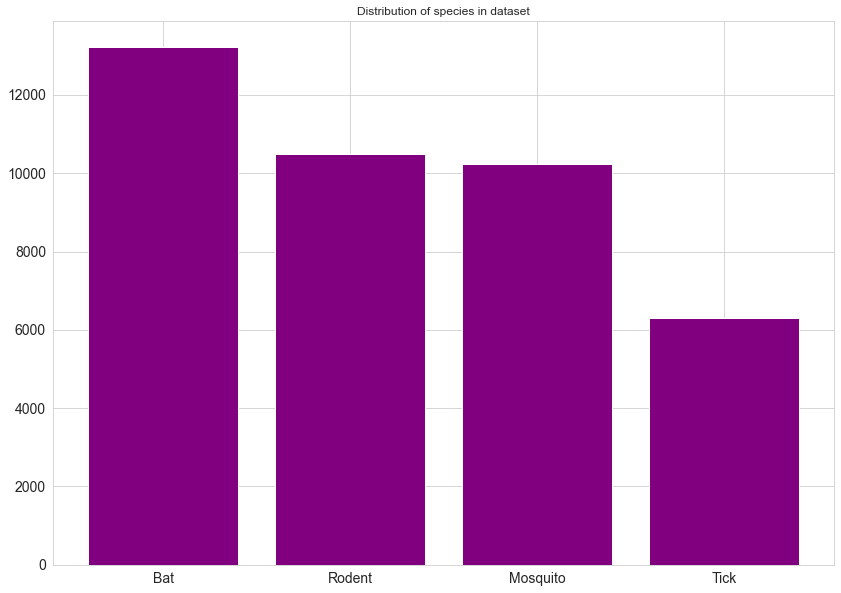

In [387]:
sns.set_style("whitegrid")
fig, ax=plt.subplots(figsize=(14, 10))
ax.bar(viruses['Host_Species'].value_counts().index, viruses['Host_Species'].value_counts().values, color='purple')
ax.set_xticklabels(viruses['Host_Species'].value_counts().index, size=14)
ax.set_yticklabels(np.arange(0, 14000, 2000), size=14)
ax.set_title('Distribution of species in dataset');

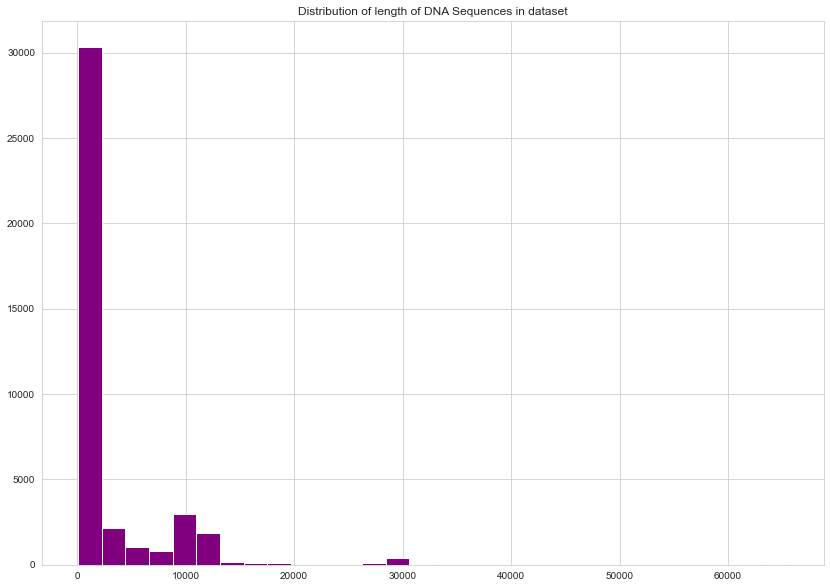

In [388]:
fig, ax=plt.subplots(figsize=(14, 10))
ax.hist(viruses['DNA_length'], bins=30, color='purple')
ax.set_title('Distribution of length of DNA Sequences in dataset');

In [389]:
letters=['A', 'C', 'G', 'T']
seven_combos=[]
for c in product(letters, repeat=7):
    s=''
    for k in c:
        s+=k
    seven_combos.append(s)
six_combos=[]
for c in product(letters, repeat=6):
    s=''
    for k in c:
        s+=k
    six_combos.append(s)

for seven_combo in random.sample(seven_combos, 400):
    viruses[seven_combo]=viruses['DNA_Sequence'].apply(lambda x: 1 if seven_combo in x else 0)
for six_combo in random.sample(six_combos, 400):
    viruses[six_combo]=viruses['DNA_Sequence'].apply(lambda x: 1 if six_combo in x else 0)
viruses

,Name,DNA_Sequence,DNA_length,Host_Species,CCATCCA,AAGTGGT,ACTTGAA,GCAACAT,TATATCG,AATATGG,...,TGGTCG,TAATCT,AAACTA,CCTAGA,CACCGT,TCTGGT,AGAGCT,ACAGAA,TTCTCT,AAGCCT
0,M.natalensis-wt/MLI/2017/13A (RVI13445),CCCCCCTCCGCCCCGACTGAGCCAAGTGCCCCCGGGGGGACGTTTG...,65535,Rodent,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
1,CPXV/Rat Koelle (RVI07739),AGAGATAAAACTTTTTTTACGACTCCATCAGAAAGAGGTTTAATAT...,65535,Rodent,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
2,s09_sk3086 (RVI07520),CCCCCCCGGCCTCTGAGTGCGCGCGGCCCCCCCGGGGGGGTGTTTT...,65535,Rodent,1,0,0,1,1,0,...,1,1,1,1,1,1,1,1,1,1
3,s02_sk2676 (RVI07522),CCCCCCCGGCCGTCTGAGTGCGCGCGGGCCCCCCGGGGGGGTATTT...,65535,Rodent,1,1,0,1,1,0,...,1,1,1,1,1,1,1,1,1,1
4,4556 (RVI11741),ACAAAATCTACTTTAAAGATAGTCTTGTGGTTACAGTCTGCCACCT...,65535,Rodent,1,1,1,1,0,1,...,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40247,RVH/18802-1/M.das/DK/2016 (BVI12858),AACTTGCACAGCTCTCACTAAGAATACAAAAAATGGAATCAGAAAC...,58,Bat,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
40248,UPM126-Selangor (MVI13607),AAAGAACTAGGAACCCTGACCAGCGCCATCAACCGGCGGAGCTCAA...,53,Mosquito,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
40249,UPM112-Selangor (MVI13605),AAAGAACTAGGAACCCTGACCAGCGCCATCAACCGGCGGAGCTCAA...,52,Mosquito,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
40250,Th-mos-A1 (MVI04803),AGGGAAAGCCAACCTTGGATTTGAATGATCAAGACAACAGCCAAGG...,51,Mosquito,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [390]:
label_encoder=LabelEncoder()
viruses['Host_Species_Encoded']=label_encoder.fit_transform(viruses['Host_Species'])

X=viruses.drop(['Name', 'DNA_Sequence', 'DNA_length', 'Host_Species', 'Host_Species_Encoded'], axis=1)
y=viruses['Host_Species_Encoded']

X_train, X_test, y_train, y_test=train_test_split(X, y, random_state=42)
X_t, X_val, y_t, y_val=train_test_split(X_train, y_train, random_state=42)

assert(len(X_t)==len(y_t))
assert(len(X_val)==len(y_val))
assert(len(X_test)==len(y_test))

In [391]:
logreg=LogisticRegression()
logreg.fit(X_t, y_t)
cross_val_score(logreg, X_t, y_t)

c:\Users\jimmy\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\jimmy\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

array([0.79046147, 0.79063604, 0.79770318, 0.79792403, 0.7959364 ])

In [392]:
accuracy_score(y_val, logreg.predict(X_val))

0.8090885002649708

In [393]:
majority_class_percent=viruses['Host_Species'].value_counts().sort_values(ascending=False)[0]/len(viruses['Host_Species'])
print(f'The baseline logistic regression model has a {round(accuracy_score(y_val, logreg.predict(X_val))/majority_class_percent, 2)*100}% increase in accuracy score compared to just guessing the majority class')

The baseline logistic regression model has a 246.0% increase in accuracy score compared to just guessing the majority class
